In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as iter
# import random as rand
sns.set()
import re
import sys

In [2]:
import os
os.system('cmd command')

0

In [6]:
%ls
# %cd new_DS_shit/
# %cd Github/
# %del Guitar-Scales-by-Lloyd-English.pdf/
# %cd ../

 Volume in drive C has no label.
 Volume Serial Number is 4CD3-B1F1

 Directory of C:\Users\AMOS OSHIYOYE\Documents

10/01/2022  08:18 PM    <DIR>          .
10/01/2022  08:18 PM    <DIR>          ..
12/06/2017  01:21 PM            15,243 2017 Annual Seed Report.docx
11/20/2010  02:00 PM            38,145 2017 Eggua Rice Farmer Data 2.docx
11/17/2017  12:46 PM            35,087 2017 Eggua Rice Project Input Collection Data.docx
05/07/2018  10:04 PM            13,441 alternative.docx
05/07/2018  09:01 PM            15,412 april emergency meeting.docx
03/29/2018  10:19 AM            16,105 Back to Office Report from ABP 1.docx
10/06/2022  09:01 PM    <DIR>          Bluetooth Exchange Folder
11/08/2010  11:41 AM            23,560 CAPITAL COSTS.docx
05/29/2022  08:52 PM            56,531 codes for windows 7.png
05/03/2018  07:40 PM             3,802 CVMay2018.txt
12/03/2017  06:49 PM            13,493 DECEMBER 2017.docx
12/06/2017  09:20 AM            19,702 Eggua Rice Report.docx
12/03/20

In [51]:
pres_df.describe()

,order,age,height
count,45.000000,45.000000,45.000000
mean,23.022222,55.000000,180.000000
std,13.136502,6.595453,6.977236
min,1.000000,42.000000,163.000000
25%,12.000000,51.000000,175.000000
50%,23.000000,55.000000,182.000000
75%,34.000000,58.000000,183.000000
max,45.000000,70.000000,193.000000


In [18]:
pres_df=pd.read_csv('president_heights_party.csv')

In [20]:
pres_df.columns

Index(['order', 'name', 'age', 'height', 'party'], dtype='object')

In [ ]:
# pres_df.drop('order', axis=1, inplace=True)

In [ ]:
pres_df.head(4)

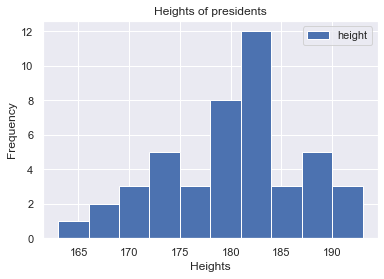

In [21]:
pres_df.plot(kind='hist',y='height', title='Heights of presidents')
plt.xlabel('Heights')
plt.show()

In [50]:
pres_df.groupby('party').agg({'height':[np.mean,sum,np.median],'age':[np.mean,sum,np.median]})

height                     age             
                             mean   sum median       mean   sum median
party                                                                 
democratic             181.066667  2716  180.0  52.600000   789   52.0
democratic-republican  176.500000   706  177.0  57.250000   229   57.0
federalist             170.000000   170  170.0  61.000000    61   61.0
national union         178.000000   178  178.0  56.000000    56   56.0
none                   189.000000   189  189.0  57.000000    57   57.0
republican             180.894737  3437  182.0  55.263158  1050   54.0
whig                   176.000000   704  174.0  58.250000   233   57.5

In [65]:
pres_df.party.unique()

array(['none', 'federalist', 'democratic-republican', 'democratic',
       'whig', 'republican', 'national union'], dtype=object)

In [ ]:
party_unique={}
for party_name,index in enumerate(pres__df['party'].unique()):
    party_unique[index]=party_name

In [95]:
(pres_df['party']=='national union')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
Name: party, dtype: bool

In [111]:
drop_index=pres_df[(pres_df['party']=='none')|(pres_df['party']=='federalist')|(pres_df['party']=='national union')].index

In [ ]:
pres_df.index['']

In [114]:
pres__df=pres_df.drop(drop_index)

In [ ]:
colours_of_party=[party_unique[i] for i in pres__df['party']]

In [ ]:
pres__df['age'].max()

In [ ]:
pres__df

In [ ]:
# ax=plt.subplot(111)
pres_scatter=plt.scatter( x='age',y='height',data=pres__df,c=colours_of_party)
# plt.xlim(pres_df['age'].min()-5,pres_df['age'].max()+5)
# plt.ylim(pres_df['height'].min()-5,200)
plt.legend(handles=pres_scatter.legend_elements()[0],labels=party_unique.keys(),bbox_to_anchor=(1.489,0.56),shadow=True,title='Party Unique'.upper())

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [53]:
lR=LinearRegression()

In [115]:
X=pres__df[['age']]
Y=pres__df['height']
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
# train_test_split(pres_df, )?

In [116]:
lR.fit(X_train,Y_train)

LinearRegression()

In [117]:
lR.intercept_

175.33301940101717

In [57]:
pres_df['party'].value_counts()

republican               19
democratic               15
democratic-republican     4
whig                      4
none                      1
federalist                1
national union            1
Name: party, dtype: int64

In [118]:
lR.predict([[70]])

c:\users\amos oshiyoye\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([182.37389339])

In [59]:
pres_df.loc[pres_df['party']=='national union']

,order,name,age,height,party
16,17,Andrew Johnson,56,178,national union


In [60]:
#Using SKlearn stadtviertel

In [122]:
X1=pres__df[['age','height']]
Y1=pres__df['party']

In [123]:
from sklearn.model_selection import train_test_split
X1_train,X1_test,Y1_train,Y1_test=train_test_split(X1,Y1,test_size=0.3,random_state=1, stratify=Y1)

In [124]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)

In [125]:
knn.fit(X1_train,Y1_train)

KNeighborsClassifier(n_neighbors=2)

In [126]:
pred=knn.predict(X1_test)

In [127]:
Y1_pred_proba=knn.predict_proba(X1_test)

In [ ]:
((pred==Y1_test.values).sum())/Y1_test.size

In [128]:
knn.score(X1_test,Y1_test)

0.6153846153846154

In [129]:
Y1_test.values

array(['democratic', 'democratic', 'whig', 'republican', 'democratic',
       'democratic-republican', 'democratic', 'democratic', 'republican',
       'republican', 'republican', 'republican', 'republican'],
      dtype=object)

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(Y1_test,pred)

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
knn_cv=cross_val_score(knn,X1,Y1,cv=3)
knn_cv

In [ ]:
knn

In [ ]:
# arr_centred.mean(0).round(4)

In [ ]:
x=np.linspace(0,5,50)
y=np.linspace(0,5,50)[:,np.newaxis]
z=np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [ ]:
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5],cmap='viridis')
plt.colorbar();

In [ ]:
all_sets

In [ ]:
new_sets=set ([21,33,12])

In [ ]:
all_sets=new_sets

In [ ]:
all_sets.issubset(new_sets)

In [ ]:
arr1=np.array([1,0,1,1,0,1])
arr2=np.array([0,1,0,0,0,1])


In [ ]:
(arr1 & arr2)

In [ ]:
~arr2

In [ ]:
print(list(iter.combinations(range(3),3)))

In [ ]:
np.random.multivariate_normal?

In [ ]:
list(iter.permutations(range(4),2))

In [ ]:
sns.scatterplot(x='age',y='height', data= pres_df)

# hier ist ein Ei, mochtest du ein Kaffee fur mich kaufen
# Ich brache eine kleidung fur meine schwester.

In [ ]:
mean = [1, 1]
cov = [[1, 2],[2, 5]]
X = np.random.multivariate_normal(mean, cov, 100)

In [ ]:
selected=np.random.choice(X.shape[0],20,replace=False)

In [ ]:
select=X[selected]

In [ ]:
select.shape

In [ ]:
%matplotlib inline
plt.scatter(X[:,0],X[:,1],alpha=0.3)
plt.scatter(select[:,0],select[:,1],facecolor='none',s=50)
sns.set()

In [ ]:
x=np.zeros(10)
i=[2,3,3,4,4,4]
np.add.at(x,i,4)

In [ ]:
knn=np.random.rand(10,2)

In [ ]:
knn

In [ ]:
knn[:,np.newaxis,:].shape

In [ ]:
knn[np.newaxis,:,:].shape

In [ ]:
 0.88034098-0.64401926

In [ ]:
# knn=np.random.rand(10,2)

In [ ]:
plt.scatter(knn[:,0],knn[:,1])

In [ ]:
knn[np.newaxis,:,:]

In [ ]:
np.array([[0.2835313 , 0.88034098]])-np.array([[0.2835313 , 0.88034098],
[0.62586126, 0.64401926],
[0.81030683, 0.14819023],
[0.24604424, 0.53482592],
[0.13915836, 0.55014405],
[0.42203612, 0.82712441],
[0.70399057, 0.55748275],
[0.89525007, 0.63838845],
[0.69282795, 0.59248741],
[0.96805253, 0.60311561]])

In [ ]:
kn=(knn[:,np.newaxis,:]-knn[np.newaxis,:,:])

In [ ]:
kn.sum(-1)

In [ ]:
kn.sum(-1).diagonal()

In [ ]:
kn.shape

In [ ]:
arr=np.random.randint(0,10,(3,3))

In [ ]:
arr=arr[:,np.newaxis,:]

In [ ]:
arr[1]-arr[0]

In [ ]:
arr

In [ ]:
(arr[np.newaxis,:,:])

In [ ]:
car=np.random.randint(0,10,(2,2))

In [ ]:
car

In [ ]:
cra=car[:,np.newaxis,:]
print(cra)
cra.shape

In [ ]:
arc=car[np.newaxis,:,:]
print(arc)
arc.shape

# (2,4,3)

In [ ]:
cam=np.array([
    [[1,2,3]],
    [[1,2,3]],
])

In [ ]:
cam.shape

In [ ]:
np.array([[
    [4,6]],
    [[1,7]]
]).shape

In [ ]:
nab=np.array([
                [[1,2]],
                [[1,2]]                
                     ])

In [ ]:
nab.shape

In [ ]:
np.array([[[4,7],[4,7]]]).shape

In [ ]:
(arc-cra).shape
# 2,2,2

In [ ]:
arc
# 1,1,2,2

In [ ]:
barc=arc

In [ ]:
barc.shape
# 1,1,1,2

In [ ]:
ax=x.argsort()

In [ ]:
x[ax]

In [ ]:
knd=(kn.sum(-1))**2

In [ ]:
knd

In [ ]:
knd.round(2)

In [ ]:
knd.argsort()

In [ ]:
k=2
nearest_knd=knd.argpartition(k+1)

In [ ]:
nearest_knd

In [ ]:

plt.scatter(knn[:,0],knn[:,1])
sns.set()

In [ ]:
nearest_knd[9]

In [ ]:
for i in range(10):
    print(i)

In [ ]:
plt.scatter(knn[:,0],knn[:,1])
for i in range(knn.shape[0]):
    for j in nearest_knd[i, :k+1]:
        plt.plot(*zip(X[j], X[i]), color='black')


In [ ]:
# status=pd.Series({'Dad':'Head','Ma':'Assist'})
# pos=pd.Series({'Dad':'01','Ma':'02'})
# loc=pd.Series({"Dad":'Nig','Ma':"Nig"})

mem=["Dad",'Ma',"Mama D",'Tee Boi', 'Abi Boi','Bobo D']

status=pd.Series(['Head','Assist','Somebody\'s wife','Fransozisch', 'Data Boi','Disturbance'], index=["Dad",'Ma',"Mama D",'Tee Boi', 'Abi Boi','Bobo D'])
pos=pd.Series(['01','02','03','04', '05','06'], index=mem)
loc=pd.Series(['Nig',"Nig",'Nig','Fra', 'Nig','Nig'], index=mem)



In [ ]:
fam=pd.DataFrame({"Status":status,"Position":pos, 'Location':loc},index=(mem))

In [ ]:
fam

In [ ]:
pd.Series.groupby().

In [ ]:
alle.head(10).sort_values(by='year', ascending=True)

In [ ]:
above18=alle.head(10).sort_values(by='year', ascending=True).groupby(['year','ages'])['population'].mean().unstack()

In [ ]:
alle[state].fi('USA')

In [ ]:
# del all_ages
above18

In [ ]:
all_ages_index=alles[alles['ages']=='under18'].index
# alle.loc[]

In [ ]:
def above(x):
    return x['total']-x['under18']

In [ ]:
# alle.loc[all_ages,'ages']==alle.loc[ages,'ages']*-1
alles.loc[all_ages,'ages']*(-1)

In [ ]:
alle.head()

In [ ]:
alle.groupby(['year','population'])['ages']

In [ ]:
def above18(x):
    '''
    to find the population of people above the age of 18
    '''
    rem=x['total']-x['under18']
    return rem

In [ ]:
def appf(x):
    x['data1']/=x['data2'].sum()
    return x

In [ ]:
df.groupby('key').apply(appf)

In [ ]:
status[[0,3,5]]

In [ ]:
fam.loc['Tee Boi':,:"Location"]

In [ ]:
# %xmode
rng = np.random.RandomState(42)
ser = pd.DataFrame(rng.randint(0, 10, (3,4)), columns=['A','B','C','D'])

In [ ]:
ser

In [ ]:
A=pd.DataFrame(rng.randint(1,20,(2,2,)), columns=list('AB'))

In [ ]:
A

In [ ]:
B=pd.DataFrame(rng.randint(1,10,(4,4)), columns=list('QRST'))

In [ ]:
B

In [ ]:
gab=pd.Series([23,np.nan,'crib',34,None,17])

In [ ]:
gab.isna()

In [ ]:
pd.MultiIndex.from_tuples([('Dad',0),('Ma',1),('Dan',2),('Bio',3),(0,0,1,1)])

In [ ]:
gab.isna()

In [ ]:
gab.fillna(value=gab.mean().round(2))

In [ ]:
B.subtract(B.iloc[1])

In [ ]:
list(iter.product(['Abiodun','Baba','Tee','Bobo D'],['Mama D','Ma']))

In [ ]:
cases=pd.MultiIndex.from_tuples([('Abiodun','1'),('Baba','2'),('Tee','1'),('Bobo D','2')])

In [ ]:
cases

In [ ]:
case=pd.MultiIndex.from_product([['a','b'],['1','2']])

In [ ]:
case

In [ ]:
list('ABCD')

In [ ]:
index = [('California', 2000), ('California', 2010),
('New York', 2000), ('New York', 2010),
('Texas', 2000), ('Texas', 2010)]
populations = [33871648, 37253956,
18976457, 19378102,
20851820, 25145561]
pop = pd.Series(populations, index=index)

In [ ]:
pop

In [ ]:
pop__df=pd.DataFrame({'State':pop},index=pd.MultiIndex.from_tuples(index))

In [ ]:
pop__df

In [ ]:
pop.index=pd.MultiIndex.from_tuples(index)

In [ ]:
pop_df=pd.DataFrame({'everyone':pop,'u18':[9267089, 9284094, 4687374, 4318033,5906301, 6879014]})


In [ ]:
pop_df.index.names=['State','Year']

In [ ]:
pop_df

In [ ]:
pop[:,2000], pop[:,2010]

In [ ]:
indices = pd.MultiIndex.from_product([[2013, 2014], [1, 2]],
names=['Year', 'Visit'])

In [ ]:
indices

In [ ]:
cols=pd.MultiIndex.from_product([['Bob', 'Guido', 'Sue'], ['HR', 'Temp']],
names=['Subject', 'Type'])

In [ ]:
cols

In [ ]:
data = np.round(np.random.randn(4, 6), 2, out=data)
# data[:, ::2] *= 10
# data += 37

In [ ]:
data[:, ::2] *= 10
data += 37

In [ ]:
data

In [ ]:
data

In [ ]:
-0.57+37

In [ ]:
med_rec=pd.DataFrame(data=data,index=indices,columns=cols)

In [ ]:
med_rec

In [ ]:
(med_rec['Bob']).shape

In [ ]:
(med_rec[['Bob']]).shape

In [ ]:
index=pd.MultiIndex.from_product([['Jan','May','July'],list(range(1,32))])

In [ ]:
col=pd.MultiIndex.from_product([['Credit','Debit'],['First Quarter Hours','Second Quarter Hours','Third Quarter Hours','Fourth Quarter Hours']])

In [ ]:
col

In [ ]:
contributions=pd.DataFrame(data=data,index=index, columns=col)

In [ ]:
`contributions.index.names=['Month','Date']

In [ ]:
contributions.loc[:,('Credit','First Quarter Hours')]

In [ ]:
# %%timeit
contributions.isna()

In [ ]:
contributions.reset_index()

In [ ]:
med_rec

In [ ]:
bax=pd.MultiIndex.from_product([['A','B','C'],['1','2','3']])

In [ ]:
bax

In [ ]:
med_recmean=med_rec.groupby(level=0).mean()
med_recmean

In [ ]:
med_recmean.groupby(level=0).mean()

In [ ]:
arr=np.array([[4,9],[8,7]])

In [ ]:
arr

In [ ]:
np.concatenate([arr,arr],axis=0)

In [ ]:
print(__)

In [ ]:
df6 = pd.DataFrame ({ 'name' : [ 'Peter' , 'Paul' , 'Mary' ],'food' : [ 'fish' , 'beans' , 'bread' ]},columns= [ 'name' , 'food' ])
df7 = pd.DataFrame ({ 'name' : [ 'Mary' , 'Joseph' ],'drink' : [ 'wine' , 'beer' ]},columns= [ 'name' , 'drink' ])

In [ ]:
print(pd.merge(df6,df7,how='right'))

In [ ]:
Fam1=pd.DataFrame({'Parents':['Father','Mom'],'names':['Amos','Mary'],"Influence":[2,1]})
Fam2=pd.DataFrame({'Eltern':['Father','Mom'],'Salary':['200 000','150 000'], 'Position':[1,2]})

In [ ]:
print(pd.merge(Fam1,Fam2,left_on='Parents',right_on='Eltern', suffixes=[' Pa',' Ma']).drop('Parents', axis=1))

In [ ]:
df8 = pd . DataFrame ({ 'name' : [ 'Bob' , 'Jake' , 'Lisa' , 'Sue' ],'rank' : [ 1 , 2 , 3 , 4 ]})
df9 = pd . DataFrame ({ 'name' : [ 'Bob' , 'Jake' , 'Lisa' , 'Sue' ],'rank' : [ 3 , 1 , 4 , 2 ]})
print(pd.merge(df8,df9,on='name'))

In [ ]:
%cd data-USstates/

# Example 2

In [ ]:
%cd Downloads/Github/data-USstates/

In [ ]:
states_areas=pd.read_csv('state-areas.csv')
states_pop=pd.read_csv('state-population.csv')
states_abbrev=pd.read_csv('state-abbrevs.csv')

In [ ]:

# states_pop.sort_values()
print(states_pop.head())
print(states_abbrev.head())

In [ ]:
pd.merge(states_abbrev,states_pop,how='outer',right_on='state/region',left_on='abbreviation')

In [ ]:
kalle=pd.merge(states_pop,states_abbrev, how='outer', left_on='state/region',right_on='abbreviation').drop('abbreviation', axis=1)

In [ ]:
alle.info()

In [ ]:
alle.isnull().any()

In [ ]:
alle_nulls=alle.loc[alle['state'].isnull(),'state/region']
alle_nulls.unique()

In [ ]:
alle.dropna(axis=0, inplace=True)

In [ ]:
alle.loc[alle['state/region']=='PR','state']='Puerto Rico'
alle.loc[alle['state/region']=='USA','state']='United State of America'

In [ ]:
alle

In [ ]:
for (st,st_gr) in alle.isna().groupby('state'):
    print(st,st_gr.shape)

In [ ]:
# alle[alle['state'].isnull()]
# alle.loc[alle['state/region']=='PR','state']
# alle.loc[alle['year']==1990,]

In [ ]:
ages_edwarchne=alle.pivot_table('population',columns='ages',index=['year','state/region'])
ages_edwarchne.loc[[:,'PR'],]

In [ ]:
(ages_edwarchne['total']-ages_edwarchne['under18']).unstack()

In [ ]:
for

In [ ]:
all_data=pd.merge(states_areas,alle,on='state',how='outer',)

In [ ]:
all_data.columns

In [ ]:
all_data.isnull().any()

In [ ]:
# all_data['state'][all_data['area (sq. mi)'].isnull()]
all_data.loc[all_data['area (sq. mi)'].isnull(),'state'].unique()

In [ ]:
all_data=all_data.dropna()

In [ ]:
all_data.isnull().any()

In [ ]:
all_total_2010=all_data.query("year==2010 & ages=='total'")

In [ ]:
all_total_2010.head()

In [ ]:
all_total_2010.head(1)
all_total_2010.columns

In [ ]:
all_total_2010.set_index(['state','state/region'], inplace=True)

In [ ]:
dense2010=all_total_2010['population']/all_total_2010['area (sq. mi)']

In [ ]:
dense2010.sort_values(ascending=True)

In [ ]:
dense2010.max()

In [ ]:
PR_1=alle[(alle['state/region']=='PR')&(alle['population']>1)]
PR_1q=PR_1.query('ages=="under18" & year>2000')

In [ ]:
alle.head(6)

In [ ]:
PR_1q.reset_index(drop=True,inplace=True)

In [ ]:
alle.set_index(['state','ages'])

In [ ]:
alle[alle['ages']=='total']

In [ ]:
alle.iloc[53:59]

In [ ]:
alle.loc[alle['year']>2010,'year':'state']

In [ ]:
alle.groupby('ages').aggregate(['min',np.median,max])

In [ ]:
alle.groupby('year')['population'].sum()

# Example 3

In [ ]:
planets_data=sns.load_dataset('planets')

In [ ]:
planets_data.head()
# planets_data.shape

In [ ]:
planets_data.info()

In [ ]:
planets_data.isnull().sum()

In [ ]:
planets_data[planets_data.isna().any(axis=1)]
# planets_data.loc[planets_data['method'].isna():planets_data['mass'].isna()]
# planets_data.notna()
# planets_data.shape

In [ ]:
#dropped all NaN data
planets_data_nd=planets_data.dropna()
planets_data_nd.sort_values(by='year', inplace=True)
planets_data_nd.reset_index(drop=True, inplace=True)
planets_data_nd.index=planets_data_nd.index+1

In [ ]:
planets_data_nd.columns

In [ ]:
planets_data_nd[planets_data_nd.loc[:,'mass']==3]

In [ ]:
# to reload PLT
from importlib import reload
plt=reload(plt)

In [ ]:
planets_data_nd.columns

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
model_planets=LinearRegression()

In [ ]:
X=planets_data_nd[['orbital_period']]
Y=planets_data_nd['year']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

In [ ]:
model_planets.fit(X_train,Y_train)

In [ ]:
model_planets.coef_

In [ ]:
y_test_pred=model_planets.predict(X_test)
# y_train_pred=model_planets.predict(X_train)

In [ ]:
plt.scatter(X_test,Y_test,label='testing data')
plt.plot(X_test,y_test_pred,linewidth=3,linestyle='dashed', c='k',label='predicted data')
plt.xlabel('Orbital Period')
plt.title('Orbial Period against Year of the planetary bodies')
plt.ylabel('Year')
plt.legend()

In [ ]:
X_test.max(numeric_only=True).mass

In [ ]:
plt.scatter(X_test,residuals)

plt.hlines(y=0,xmin=X_test.min(), xmax=X_test.max(),colors='k',linestyles='dashed')
plt.xlim(0,X_test.max().mass+2)
plt.xlabel('Distance')
plt.ylabel('residuals')

In [ ]:
residuals=Y_test-y_test_pred
(residuals**2).mean()

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,y_test_pred)

In [ ]:
model_planets.score(X_test,Y_test)

In [ ]:
planets_data_nd.corr()

In [ ]:
# fig=plt.figure()
# plt.scatter(x='mass',y='distance',data=planets_data_nd)
sns.scatterplot(x='orbital_period',y='mass', data=planets_data_nd)
plt.legend()
plt.xlabel('mass')
plt.ylabel('distance')
plt.title('Mass against Distance')
plt.show()

In [ ]:
planets_data.sort_values(by='method',ascending=True)

In [ ]:
planets_data[planets_data['method']=='Transit Timing Variations']

In [ ]:
planets_data.groupby('method')['year'].describe()

In [ ]:
planets_data[planets_data['method']=='Transit Timing Variations'].count()

In [ ]:
for ( method , group ) in planets_data.groupby( 'method' ):
    print ( "{0:30s} shape={1}" . format ( method , group.shape))

In [ ]:
decade = 10 * ( planets_data [ 'year' ] // 10 )
decade = decade . astype ( str ) + 's'
# decade . name = 'decade'
planets_data . groupby ([ 'method' , decade ])[ 'number' ] . sum ().unstack(). fillna ( 0 )

In [ ]:
alle.head()

In [ ]:
alle.groupby('year')[['ages']].sum()

In [ ]:
alle.columns

In [ ]:
df1=pd.DataFrame({'A':[1,2,3],'B':list('345')},index=['i','j','k'])

In [ ]:
df=pd.DataFrame({'cast':['Sam','Noah','Downey'],'production':['Cap America','Hulk','Thor']})

In [ ]:
df1

In [ ]:
df1.groupby(str.upper).mean(0)

In [ ]:
age=['under18','total']
# alle.groupby(['year','ages']).agg()
alle.set_index(['state/region'], inplace=True)
alle.head()

In [ ]:
alle.pivot_table(values=['population','year'],columns='ages')

In [ ]:
titanic=sns.load_dataset('titanic')

In [ ]:
titanic.columns

In [ ]:
titanic.head()

In [ ]:
titanic['alone'].

In [ ]:
titanic.groupby(['age']).agg({'survived':[np.median,min,max],'alone':[np.median,min,max]})

In [ ]:
titanic . groupby ( 'sex' )[['survived','pclass','fare']].std()

In [ ]:
titanic[titanic.loc[:,'fare']==0]['age']

In [ ]:
for (classes,grous) in titanic.groupby('pclass')['survived','sex','age','fare']:
    print(f'{classes},                  ,{grous.shape}')

In [ ]:
planets_data.head()

In [ ]:
decade=planets_data['year']

In [ ]:
decade

In [ ]:
titanic['age'].describe()

In [ ]:
age=pd.qcut(titanic['age'],2)

In [ ]:
age

In [ ]:
titanic.columns

In [ ]:
titanic.pivot_table('survived',['alone',age],'class')


In [ ]:
# shell command to download the data:
!curl -O https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [ ]:
!git status

In [ ]:
!ls

In [ ]:
!pwd

In [ ]:
%ls

In [ ]:
%cd ..

In [ ]:
%mkdir Birth_CDC

In [ ]:
%cd Birth_CDC/

In [ ]:
%ls

In [ ]:
!git fetch https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv